# SOCIAL MEDIA DEMOGRAPHICS

What are the demographics of the world's largest social media platform?

Average Gender?
Average Age?
Most Common Date Of Birth?


<img src="https://1000logos.net/wp-content/uploads/2016/11/meta-logo.png" alt="drawing" width="60" height='40' style='display:inline'/>





# Data Cleaning and Extraction

### First, we need to get the data

In [1]:
import csv
input_file = csv.DictReader(open("cpa1_data/facebook_data.csv", "r", encoding='UTF-8'))

cleaned_user_data = [user for user in (user_image for user_image in input_file) if int(user['age'])<100]

### Next, we can get the relevant numbers for our dataset:

In [2]:
import matplotlib.pyplot as plt

male_users = [user for user in cleaned_user_data if user['gender'] == 'male']
female_users = [user for user in cleaned_user_data if user['gender'] == 'female']

user_count = len(cleaned_user_data)

male_user_count = len(male_users)
female_user_count = len(female_users)

ten_to_twenty_users = [user for user in cleaned_user_data if 10<int(user['age'])<20]
twenty_to_thirty_users = [user for user in cleaned_user_data if 21<int(user['age'])<30]
thirty_to_forty_users = [user for user in cleaned_user_data if 31<int(user['age'])<40]
forty_to_fifty_users = [user for user in cleaned_user_data if 41<int(user['age'])<50]
fifty_to_sixty_users = [user for user in cleaned_user_data if 51<int(user['age'])<60]
sixty_plus_users = [user for user in cleaned_user_data if int(user['age'])>61]

ten_to_twenty_users_count = len(ten_to_twenty_users)
twenty_to_thirty_users_count = len(twenty_to_thirty_users)
thirty_to_forty_users_count = len(thirty_to_forty_users)
forty_to_fifty_users_count = len(forty_to_fifty_users)
fifty_to_sixty_users_count = len(fifty_to_sixty_users)
sixty_plus_users_count = len(sixty_plus_users)


# Data Visualization

### Now, we can begin generating interesting plots with that data:

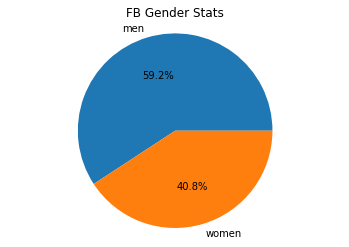

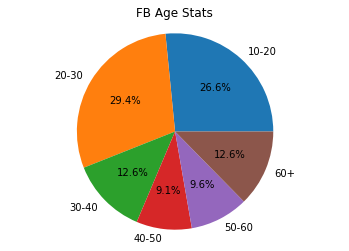

In [3]:
import matplotlib.pyplot as plt

gender_data = [((male_user_count/user_count)*100), ((female_user_count/user_count)*100)]
age_data = [((ten_to_twenty_users_count/user_count)*100), ((twenty_to_thirty_users_count/user_count)*100), ((thirty_to_forty_users_count/user_count)*100),
            ((forty_to_fifty_users_count/user_count)*100), ((fifty_to_sixty_users_count/user_count)*100), ((sixty_plus_users_count/user_count)*100)]
            
##gender plot
gender_labels = 'men','women'
plt.pie(gender_data,labels=gender_labels,autopct='%1.1f%%')
plt.title('FB Gender Stats')
plt.axis('equal')
plt.show()

##age plot
age_labels = '10-20','20-30','30-40','40-50','50-60','60+'
plt.pie(age_data,labels=age_labels,autopct='%1.1f%%')
plt.title('FB Age Stats')
plt.axis('equal')
plt.show()
